## Question 1: Extracting Tesla Stock Data Using yfinance

In [3]:
import yfinance as yf

In [4]:
# Create Ticker object for Tesla
tesla = yf.Ticker('TSLA')

# Extract historical market data
tesla_data = tesla.history(period='max')

# Reset index and show first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [29]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 142.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 145.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Question 2: Extracting Tesla Revenue Data Using Webscraping

In [38]:
import requests
import pandas as pd

# Replace with your actual Alpha Vantage API key
API_KEY = '7335NM6YAV51X23V'  # 👈 Replace with your own key from alphavantage.co
symbol = 'TSLA'

# API endpoint to fetch income statement data
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

# Parse revenue data
if 'annualReports' in data:
    reports = data['annualReports']
    tesla_revenue = pd.DataFrame(reports)[['fiscalDateEnding', 'totalRevenue']]
    tesla_revenue.columns = ['Date', 'Revenue']
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

    # Display the latest 5 entries
    display(tesla_revenue.tail())
else:
    print("Revenue data could not be fetched. Check your API key or try again later.")



,Date,Revenue
14,2010-12-31,116744000.0
15,2009-12-31,111943000.0
16,2008-12-31,14742000.0
17,2007-12-31,73000.0
18,2006-12-31,NaN


## Question 3: Extracting GameStop Stock Data Using yfinance

In [8]:
# Create Ticker object for GameStop
gme = yf.Ticker('GME')

# Extract historical market data
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping

In [39]:
import requests
import pandas as pd

# Replace with your actual Alpha Vantage API key
API_KEY = '7335NM6YAV51X23V'  # 👈 Replace 'demo' with your real API key
symbol = 'GME'

# API call to fetch income statement data
url = f'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

# Extract revenue data
if 'annualReports' in data:
    reports = data['annualReports']
    gme_revenue = pd.DataFrame(reports)[['fiscalDateEnding', 'totalRevenue']]
    gme_revenue.columns = ['Date', 'Revenue']
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

    # Show latest records
    display(gme_revenue.tail())
else:
    print("GameStop revenue data not found. Check API key or try again later.")



,Date,Revenue
15,2010-01-31,9077997000
16,2009-01-31,8805897000
17,2008-01-31,7093962000
18,2007-01-31,5318900000
19,2006-01-31,3091783000


## Question 5: Tesla Stock and Revenue Dashboard

In [30]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


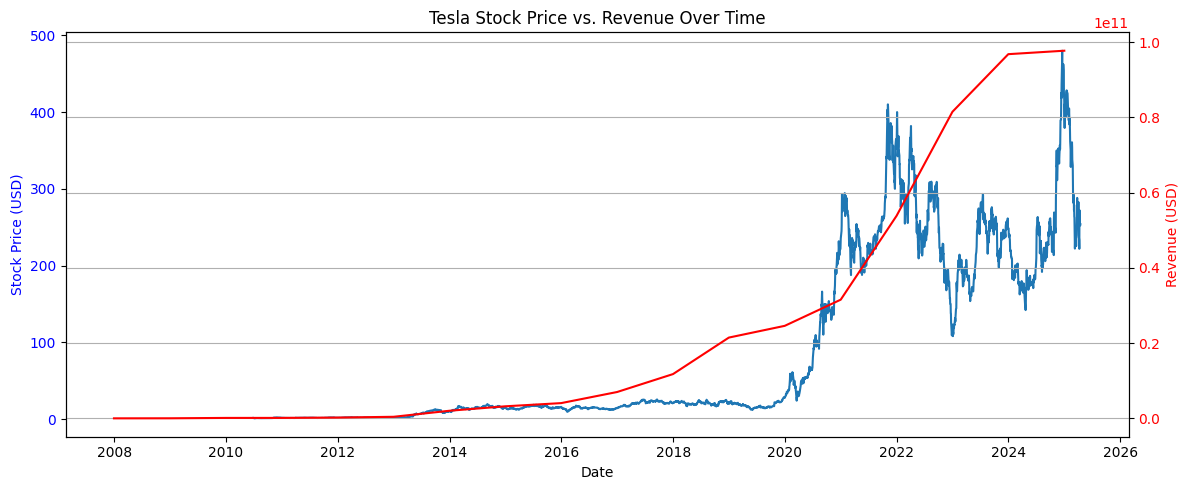

In [40]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='red', label="Revenue")
    ax2.set_ylabel('Revenue (USD)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add title and grid
    plt.title(f"{stock_name} Stock Price vs. Revenue Over Time")
    fig.tight_layout()
    plt.grid()
    plt.show()

# Call the function with Tesla data
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: GameStop Stock and Revenue Dashboard

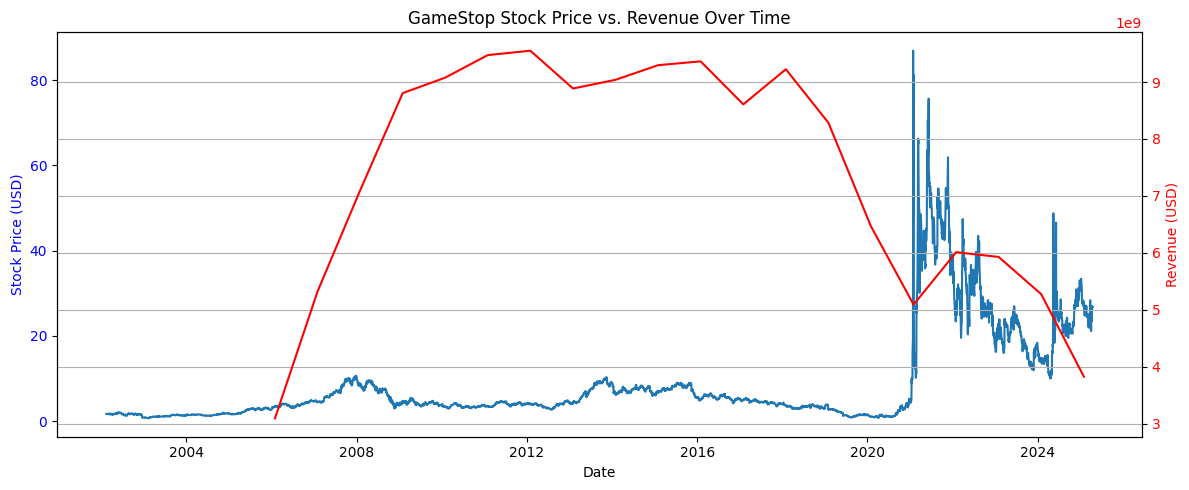

In [41]:
# Use the previously defined make_graph function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')


## Question 7: Sharing your Assignment Notebook

Make sure to submit this notebook with all the executed outputs and charts as screenshots as instructed.